# Realestate Web Scraping from Housing.com

**Imports**

In [74]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
#Creating an empty DataFrame, Final to save our looped loaded pages from the website, 'housing.com'
final = pd.DataFrame()

url = 'https://housing.com/in/buy/searches/P679xe73u28050522'
#Sending a header to the website
headers = {'USER-AGENT' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15'}
webpage = requests.get(url, headers = headers).text

soup = BeautifulSoup(webpage, 'lxml')
properties = soup.find_all('div', class_='css-zrd0bv')
sqft_price = soup.find_all('div', class_ ='css-ebj250')

#creating empty lists of all the columns to be scrapped from the website
prop_name = []
dev_name = []
flat_size = []
location = []
price = []
emi = []
possession = []
avg_sqft_price = []


for i in properties:
    try:
        prop_name.append(i.find('h2', class_ = 'css-zxue4u').text.strip())
    except:
        prop_name.append(np.nan)
    try:
        dev_name.append(i.find('div', class_ = 'css-1j62xqm').text.strip())
    except:
        dev_name.append(np.nan)
    try:
        flat_size.append(i.find('h3', class_ = 'css-197fqpq').text.strip())
    except:
        flat_size.append(np.nan)
    try:
        location.append(i.find('a', class_ = 'css-1pzt6q2').text.strip())
    except:
        location.append(np.nan)
    try:
        price.append(i.find('div', class_ = 'css-18rodr0').text.strip()[11:15])
    except:
        price.append(np.nan)
    try:
        emi.append(i.find('span', class_ = 'css-nin1gj').text.strip()[15:20])
    except:
        emi.append(np.nan)
    try:
        possession.append(i.find('div', class_ = 'css-4z3njv').text.strip())
    except:
        possession.append(np.nan)    
    try:
        avg_sqft_price.append(i.find_all('div', class_ = 'css-4z3njv')[1].text.strip())
    except:
        avg_sqft_price.append(np.nan)



    d = {'prop_name':prop_name, 'dev_name':dev_name, 'flat_size':flat_size, 'location':location, 'price':price, 'emi':emi, 'possession':possession, 'avg_sqft_price':avg_sqft_price}
    df = pd.DataFrame(d)
#Appending all the retrieved pages into final    
    final = final.append(df, ignore_index = True)

/var/folders/3t/zxnk1ncx3j59ktgkp229glgr0000gn/T/ipykernel_60355/2185033704.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df, ignore_index = True)


In [76]:
final[:650]

,prop_name,dev_name,flat_size,location,price,emi,possession,avg_sqft_price
0,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
1,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
2,Sriram River View,By SRR Estates LLP,"3, 4 BHK Flats for sale in Narsingi, Hyderabad","Narsingi,West Hyderabad,Hyderabad",2.42,70.18,"Dec, 2026",₹7.50 K/sq.ft
3,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
4,Sriram River View,By SRR Estates LLP,"3, 4 BHK Flats for sale in Narsingi, Hyderabad","Narsingi,West Hyderabad,Hyderabad",2.42,70.18,"Dec, 2026",₹7.50 K/sq.ft
...,...,...,...,...,...,...,...,...
645,Hallmark Pinnacle,By Hallmark Builders,"2, 3 BHK Flats for sale in Pati, Hyderabad","Pati,North Hyderabad,Hyderabad",1.04,37.42,"Dec, 2025",₹5.50 K/sq.ft
646,Alpine Square,By AR Anmol Developers,"2, 3 BHK Flats for sale in Patancheru, Hyderabad","Patancheru, Hyderabad",74.7,26.10,"Apr, 2023",₹5.30 K/sq.ft
647,Highgarden,By Urban Spaces,"Residential Plots for sale in Aloor, Hyderabad","Aloor,West Hyderabad,Hyderabad",1.71,29.73,"Sep, 2025",₹17.50 K/sq.yd
648,Sri Tirumala Millennium Phase III,By Engineers Associates Pvt Ltd,"2, 3 BHK Flats for sale in Mallapur, Hyderabad","Mallapur,East Hyderabad,Hyderabad",1.09,26.92,"Oct, 2027",₹5.00 K/sq.ft


In [77]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prop_name       610 non-null    object
 1   dev_name        610 non-null    object
 2   flat_size       610 non-null    object
 3   location        820 non-null    object
 4   price           820 non-null    object
 5   emi             820 non-null    object
 6   possession      820 non-null    object
 7   avg_sqft_price  820 non-null    object
dtypes: object(8)
memory usage: 51.4+ KB


In [79]:
final.head()

,prop_name,dev_name,flat_size,location,price,emi,possession,avg_sqft_price
0,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
1,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
2,Sriram River View,By SRR Estates LLP,"3, 4 BHK Flats for sale in Narsingi, Hyderabad","Narsingi,West Hyderabad,Hyderabad",2.42,70.18,"Dec, 2026",₹7.50 K/sq.ft
3,Pallavi Gardenia,By Pallavi Developers,"3 BHK Flat for sale in Nagole, Hyderabad","Nagole,East Hyderabad,Hyderabad",1.16,43.83,"Apr, 2023",₹5.40 K/sq.ft
4,Sriram River View,By SRR Estates LLP,"3, 4 BHK Flats for sale in Narsingi, Hyderabad","Narsingi,West Hyderabad,Hyderabad",2.42,70.18,"Dec, 2026",₹7.50 K/sq.ft


In [96]:
final['location']

0                 Borabanda,North Hyderabad,Hyderabad
1                 Borabanda,North Hyderabad,Hyderabad
2                Shamshabad,South Hyderabad,Hyderabad
3                 Borabanda,North Hyderabad,Hyderabad
4                Shamshabad,South Hyderabad,Hyderabad
                            ...                      
815                               Sumadhura Acropolis
816    Hiranandani Loftline Phase 3,Mokila, Hyderabad
817                                   VASAVI ATLANTIS
818           JB nature valley ,Choutuppal, Hyderabad
819                                    My Home Ankura
Name: location, Length: 820, dtype: object

**Converting Price and EMI into integers**

In [83]:
final['emi'] = pd.to_numeric(final['emi'])

In [94]:
final['price'] = pd.to_numeric(final['price'])

# EDA

<AxesSubplot: xlabel='price', ylabel='Count'>

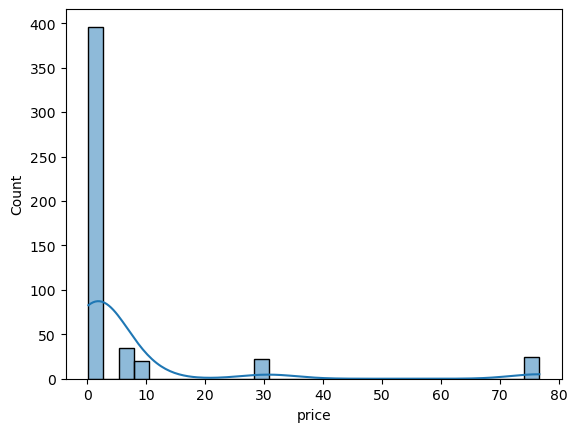

In [95]:
sns.histplot(data = final['price'][:650], kde=True, bins = 30)

<AxesSubplot: >

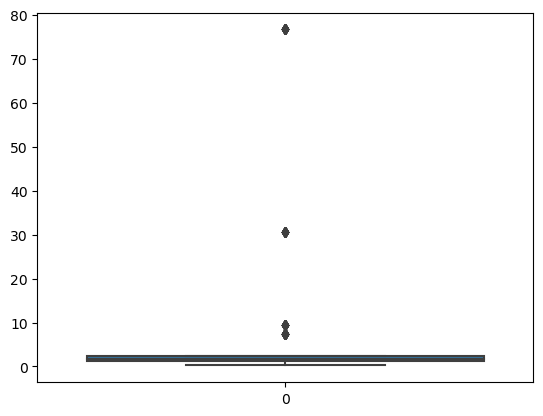

In [55]:
sns.boxplot(data = final['price'][:650])

<AxesSubplot: xlabel='emi', ylabel='Count'>

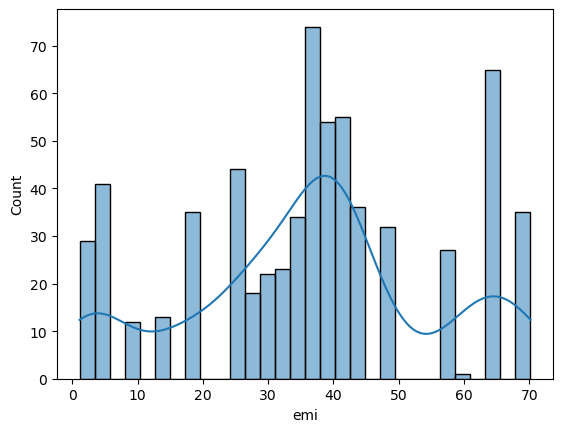

In [84]:
sns.histplot(data = final['emi'][:650], kde=True, bins = 30)